In [102]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as pl
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [127]:
data = pd.read_csv('../data/df_full.csv')
data_ct = data.groupby(['continent', 'year']).agg({'pop' : ['sum'], 'life' : ['mean'], 'fert' : ['mean']})
data_ct.columns

MultiIndex([( 'pop',  'sum'),
            ('life', 'mean'),
            ('fert', 'mean')],
           )

In [104]:
xd = data_ct[('fert')].reset_index()
yd = data_ct[('life')].reset_index()
xd = xd[['mean']]
yd = yd[['mean']]

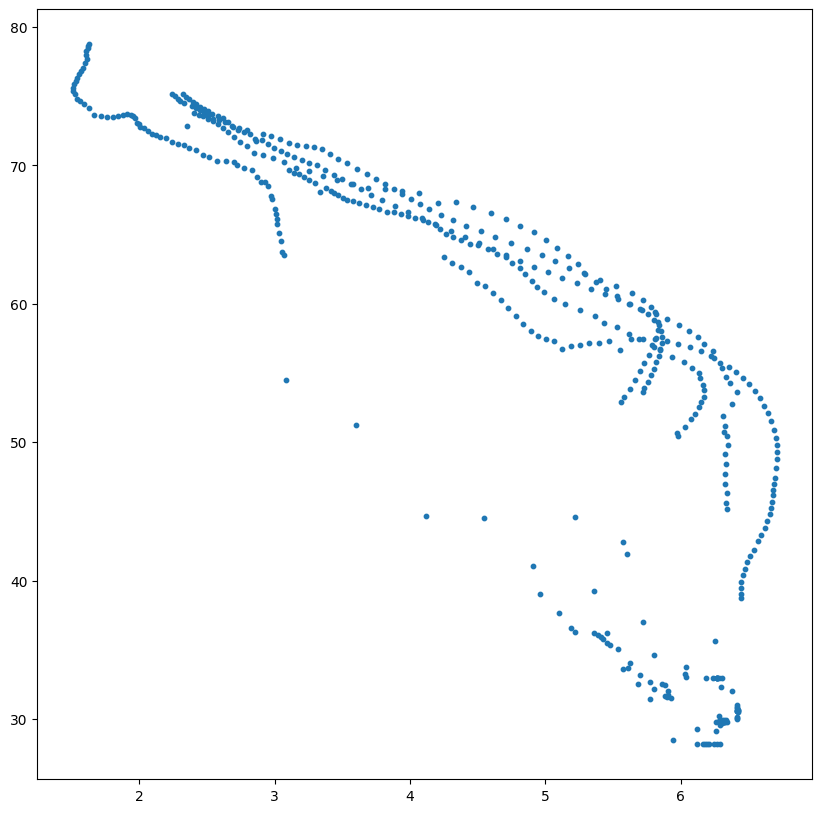

In [105]:

fig = pl.figure(figsize=(10,10))
ax = pl.axes()

ax.scatter(xd, yd, s = 10)
pl.show()

In [107]:
from sklearn.linear_model import LinearRegression


In [108]:

reg = LinearRegression().fit(xd, yd)

[b] = reg.coef_
a = reg.intercept_
print(a, b)
def reg_predict(x):
    return a + b*x

reg_predict(xd[0:1])


[92.15974986] [-7.47063095]


,mean
0,44.230316


In [109]:
reg.predict(xd[0:1])


array([[44.23031615]])

[1.5055, 80.91271496694796] [6.71204081632653, 42.016569999569256]


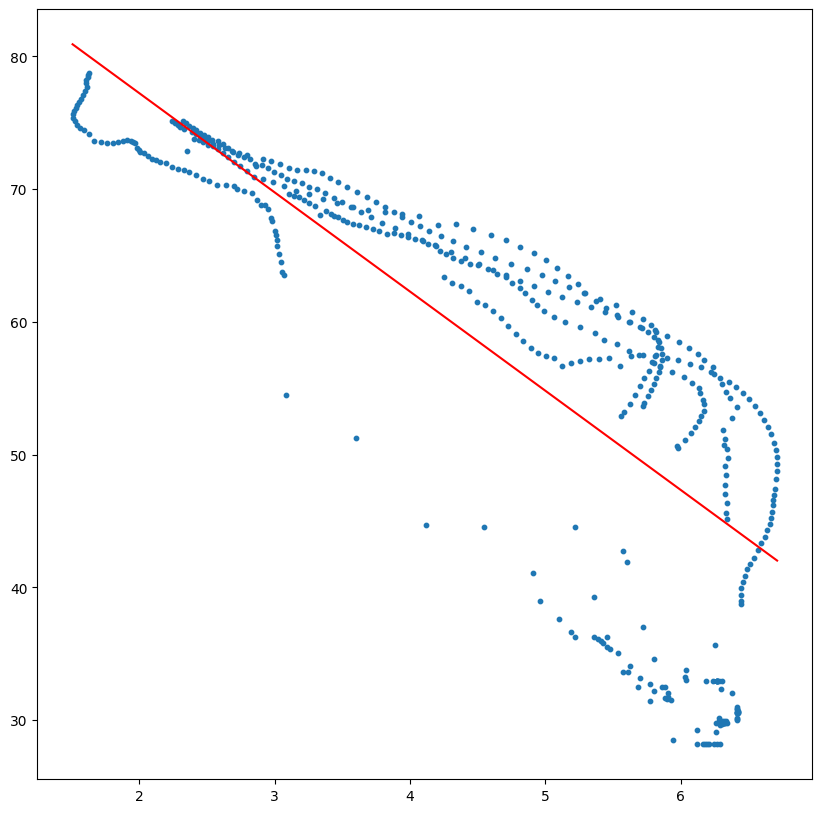

In [126]:
fig = pl.figure(figsize=(10,10))
ax = pl.axes()

ax.scatter(xd, yd, s = 10)

print([xd.min()[0], reg_predict(xd.min())[0]], [xd.max()[0], reg_predict(xd.max())[0]] )
ax.plot([xd.min(), xd.max()], [reg_predict(xd.min()), reg_predict(xd.max())], c = 'red' )


In [ ]:

pl.show()

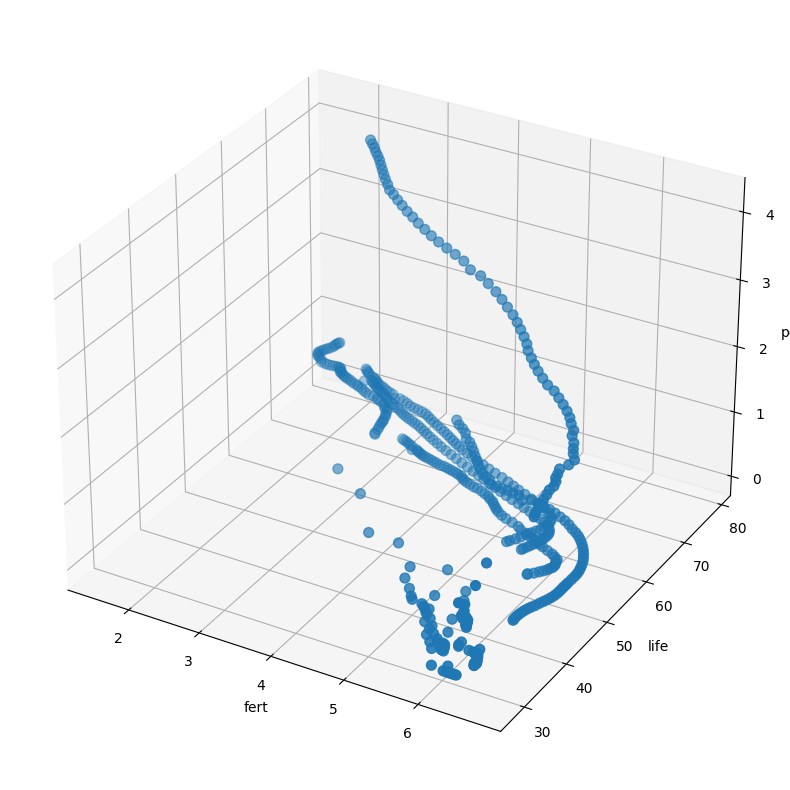

In [148]:
fig = pl.figure(figsize=(10, 10)) # создаем картинку
ax = pl.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(data_ct["fert"], data_ct["life"], data_ct["pop"], s=50)

# называем оси
ax.set_xlabel("fert")
ax.set_ylabel("life")
ax.set_zlabel("pop")

# отображаем картинку
pl.show()

In [130]:
xd = data_ct[["fert", "life"]]
yd = data_ct["pop"]

# создаем регрессор
reg = LinearRegression().fit(xd, yd)


In [135]:
import numpy as np

In [144]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()

for x in np.linspace(data_ct["fert"].min(), data_ct["fert"].max(), 100):
    for y in np.linspace(data_ct["life"].min(), data_ct["life"].max(), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

array([[-2.59597063e+08],
       [-2.47960937e+08],
       [-2.36324810e+08],
       ...,
       [ 1.24360000e+09],
       [ 1.25523613e+09],
       [ 1.26687225e+09]])

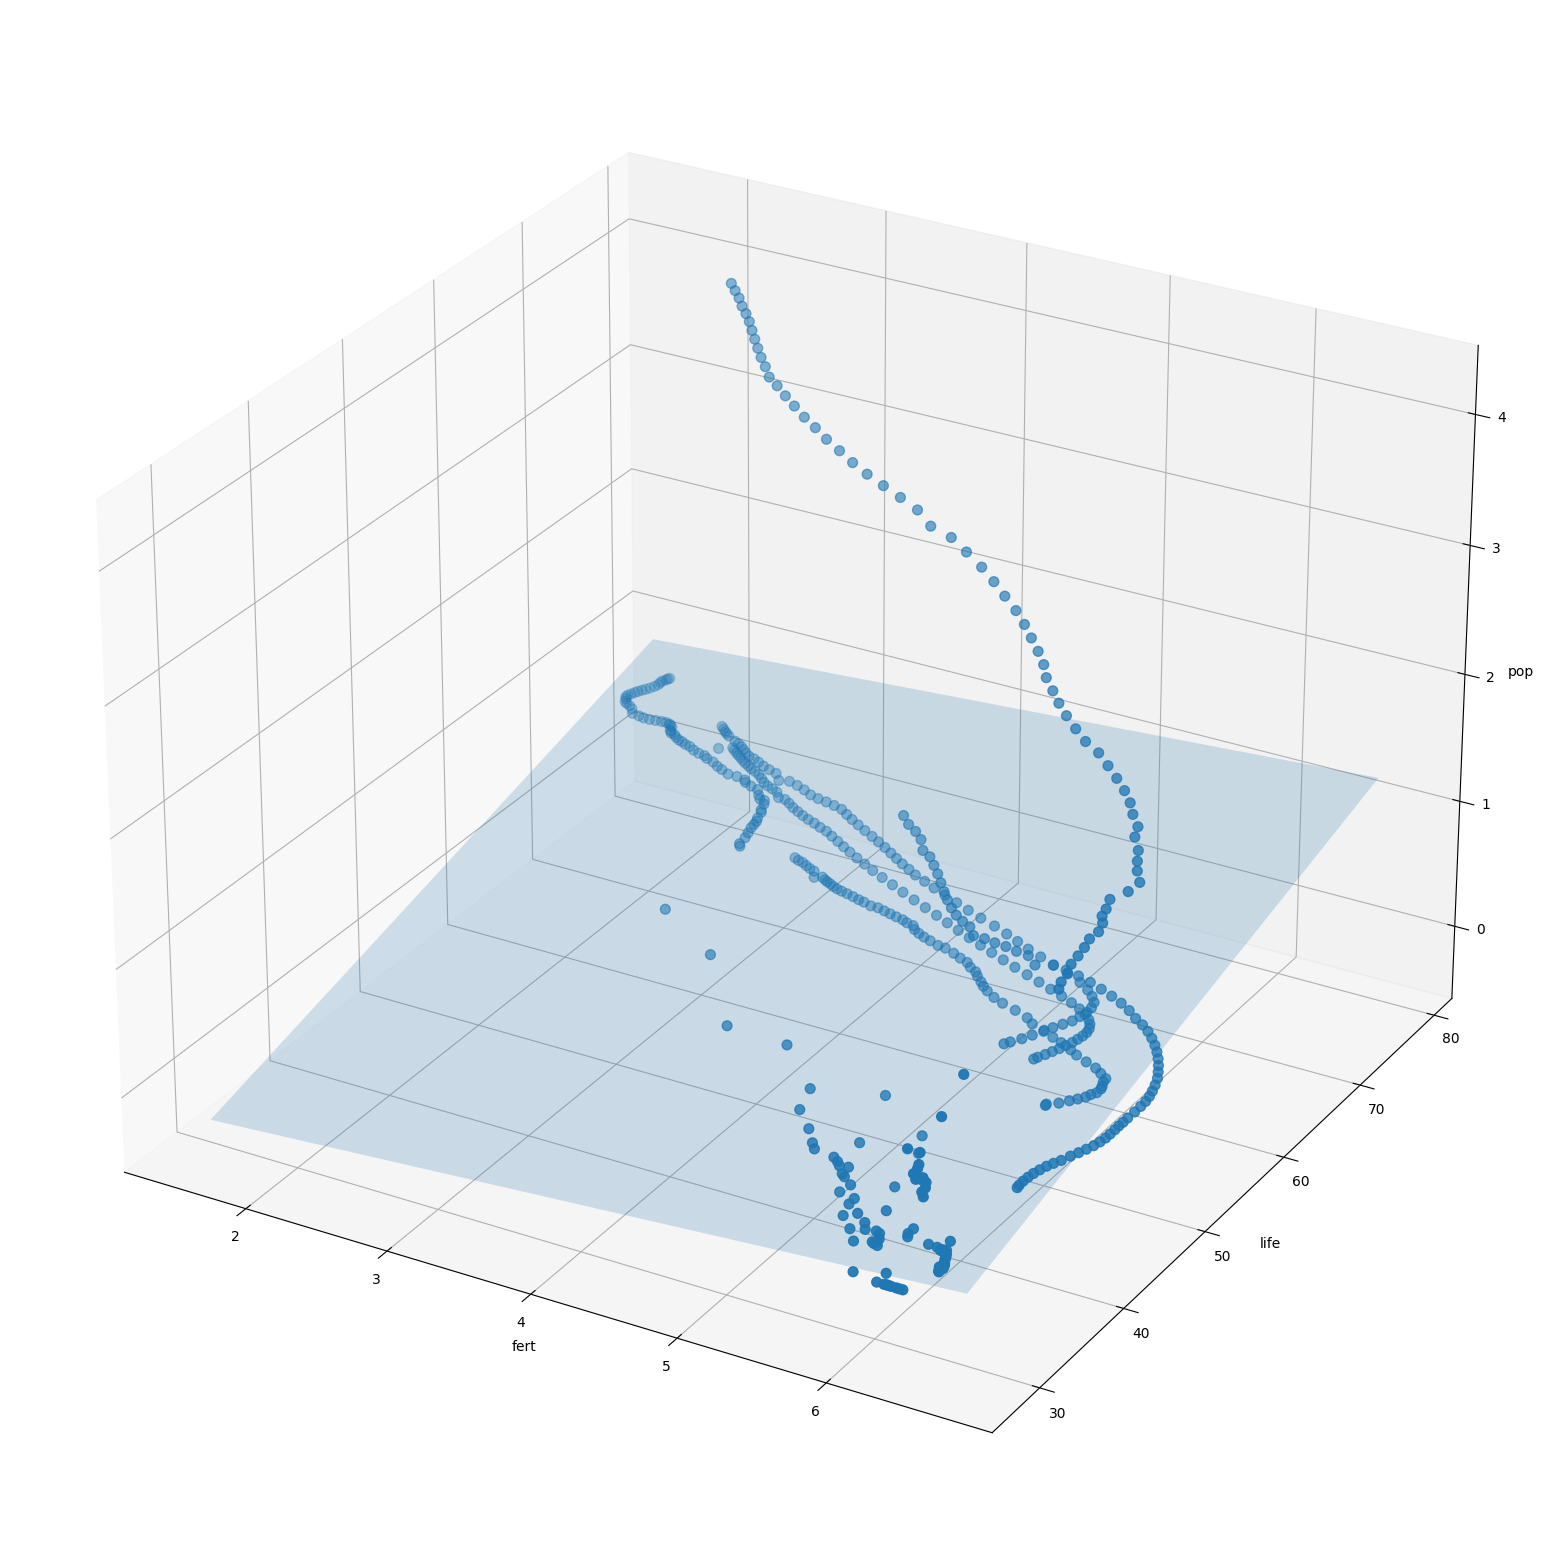

In [147]:
fig = pl.figure(figsize=(20, 20)) # создаем картинку
ax = pl.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(data_ct["fert"], data_ct["life"], data_ct["pop"], s=50)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("fert")
ax.set_ylabel("life")
ax.set_zlabel("pop")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
pl.show()